In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date.date)

2017-08-23


In [10]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print(query_date)

2016-08-23


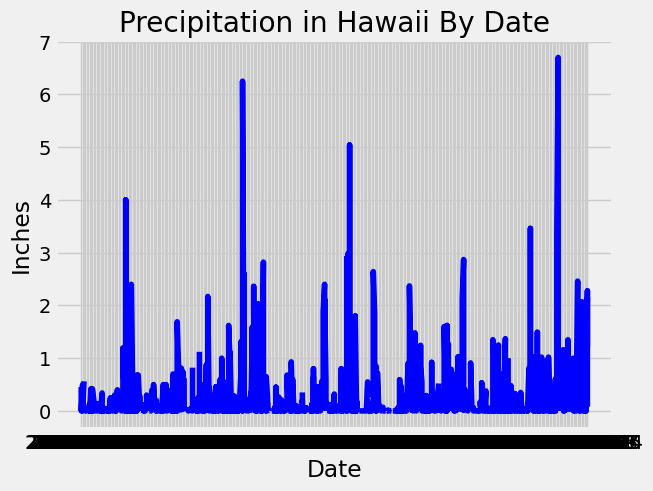

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
query_date


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date > query_date).\
            order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
rows = [{"Date": result[0], "Precipitation": result[1]} for result in results]
df = pd.DataFrame(rows).set_index("Date")


# Sort the dataframe by date
df_sorted = df.sort_values("Date", ascending = False)
df_sorted


# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(df_sorted.index.values, df_sorted["Precipitation"], color='b')
plt.title("Precipitation in Hawaii By Date")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()



In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_agg = df_sorted.agg(["mean", "median", "var", "std", "sem"])
prcp_agg

,Precipitation
mean,0.176462
median,0.020000
var,0.211865
std,0.460288
sem,0.010254


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_results = session.query(Measurement.station).distinct().all()
station_results = np.concatenate(station_results).ravel().tolist()
print(len(station_results))


9


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_stats = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            where(Measurement.station == "USC00519281").all()

station_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_date = session.query(Measurement.date).\
            where(Measurement.station == "USC00519281").\
            order_by(Measurement.date.desc()).first()

date = station_date.date
print(date)


2017-08-18


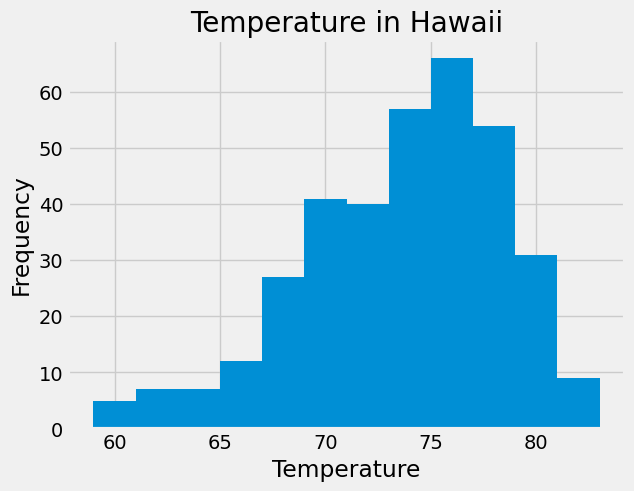

In [17]:
# Design a query to retrieve the last 12 months of temperature data and plot the results. 
# Starting from the most recent data point in the database. 

query_date = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
query_date

station_temp = session.query(Measurement.date, Measurement.tobs).\
            where(Measurement.station == "USC00519281").\
            filter(Measurement.date > query_date).\
            order_by(Measurement.date.desc()).all()

station_temp_df = pd.DataFrame(station_temp, columns = ["Date", "Temperature"]).set_index("Date")
station_temp_df

plt.hist(station_temp_df["Temperature"], bins=12)
plt.title("Temperature in Hawaii")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()




# Close session

In [18]:
# Close Session
session.close()